In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
import sys
sys.path.append("../")
from src import puhti_files, mariadb_data

In [3]:
SEED = 42
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

In [4]:
df = puhti_files.genre_data_to_pandas(data="train", add_labels=True, merge_ecco=True, better_subcat_names=True)
df = df.drop_duplicates(subset='document_id', keep="first")
df['decade'] = df['publication_year'].apply(lambda x: int(str(x)[:-1]+'0'))
df.drop(['total_price'],axis=1,inplace=True)

Read in dataset train.csv. Set param 'data' to 'dev', 'test' or 'train' if you want another dataset.


In [7]:
df['decade'].value_counts()

1770    4440
1790    4131
1780    3945
1760    3250
1750    2619
1740    1682
1730    1473
1720    1068
1710     731
1700     434
1800     320
1680       2
Name: decade, dtype: int64

In [8]:
ecco_core = mariadb_data.get_table_data("ecco_core")

In [11]:
df = pd.merge(df, ecco_core, left_on='document_id', right_on='ecco_id')

In [12]:
ecco_document_parts = mariadb_data.get_table_data("ecco_document_parts")

In [13]:
df = pd.merge(df, ecco_document_parts, left_on='document_id', right_on='ecco_id')

In [22]:
df = df[(df['ecco_languge'] == 'English') & (df['document_part_type'] == 'body')]

In [23]:
df

,document_id,work_id,main_category,sub_category,main_category_label,sub_category_label,publication_year,gatherings,publication_place,author_id,...,ecco_date_end,ecco_pages,ecco_languge,ecco_nr_paragraphs,ecco_id_y,document_part_type,document_part_number,document_part_id,document_part_nr_characters,document_part_nr_tokens
3,0745200402,49626-observations on nature and cure of fever...,1,35,Scientific Improvement,Medicine and anatomy,1779,8vo,London,88719418,...,17799999.0,265.0,English,1360.0,0745200402,body,4.0,103033.0,306091.0,53024.0
8,1373800121,75-proceedings,7,34,Politics,Parliamentary speeches,1739,8vo,London,NaN,...,17399999.0,535.0,English,5716.0,1373800121,body,4.0,784543.0,1080738.0,195422.0
10,1373800121,75-proceedings,7,34,Politics,Parliamentary speeches,1739,8vo,London,NaN,...,17399999.0,535.0,English,5716.0,1373800121,body,6.0,784633.0,1978.0,330.0
14,0577100200,12939-nabob comedy in three acts,0,0,Arts,"Theatre, plays, opera",1778,8vo,London,29561715,...,17789999.0,77.0,English,464.0,0577100200,body,4.0,367267.0,74466.0,13695.0
17,0698801300,75-proceedings,7,34,Politics,Parliamentary speeches,1712,8vo,London,NaN,...,17129999.0,111.0,English,789.0,0698801300,body,2.0,169436.0,291324.0,50050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128894,1139900101,22-iliad,2,24,Literature,Classics,1791,12mo,Dublin,224924963,...,17919999.0,351.0,English,1644.0,1139900101,body,7.0,461648.0,102482.0,18300.0
128897,1139900101,22-iliad,2,24,Literature,Classics,1791,12mo,Dublin,224924963,...,17919999.0,351.0,English,1644.0,1139900101,body,10.0,461666.0,137252.0,24691.0
128900,1139900101,22-iliad,2,24,Literature,Classics,1791,12mo,Dublin,224924963,...,17919999.0,351.0,English,1644.0,1139900101,body,13.0,461678.0,80628.0,14592.0
128903,1139900101,22-iliad,2,24,Literature,Classics,1791,12mo,Dublin,224924963,...,17919999.0,351.0,English,1644.0,1139900101,body,16.0,461688.0,70107.0,12615.0


In [24]:
df["document_id"].value_counts()

0285000100    56
0285800200    48
0715900300    46
0570900200    38
0502900200    37
              ..
1443700102     1
0003000104     1
0294300200     1
1230100800     1
1175201000     1
Name: document_id, Length: 22786, dtype: int64

In [25]:
df = df.drop_duplicates(subset='document_id', keep="first")

In [26]:
df["decade"].unique()

array([1770, 1730, 1710, 1790, 1740, 1760, 1700, 1720, 1750, 1780, 1800,
       1680])

In [27]:
df = df.query('1720 <= decade < 1800')

In [28]:
df["decade"].unique()

array([1770, 1730, 1790, 1740, 1760, 1720, 1750, 1780])

In [29]:
df = df.groupby("decade", group_keys=False).apply(lambda x: x.sample(800, replace=False))

In [31]:
df['decade'].value_counts()

1720    800
1730    800
1740    800
1750    800
1760    800
1770    800
1780    800
1790    800
Name: decade, dtype: int64

In [33]:
df['text'] = df['document_id'].apply(lambda x: puhti_files.read_text_file(x))

In [36]:
def small_clean(df):
    df['text'] = df['text'].str.lower()
    df['text'] = df["text"].str.replace('\s+', ' ', regex=True)
    #df['text'] = df['text'].str.replace(r'[^A-Za-z0-9]+', ' ', regex=True)
    return df
df = small_clean(df)

In [4]:
#df.to_csv("df_valivaihe.csv", index=False)
df = pd.read_csv("df_valivaihe.csv")
df.head(2)

,document_id,work_id,main_category,sub_category,main_category_label,sub_category_label,publication_year,gatherings,publication_place,author_id,...,ecco_languge,ecco_nr_paragraphs,ecco_id_y,document_part_type,document_part_number,document_part_id,document_part_nr_characters,document_part_nr_tokens,text,clean_t
0,1195800100,198-recruiting officer,0,0,Arts,"Theatre, plays, opera",1727,8vo,Dublin,61545511,...,English,665.0,1195800100,body,3.0,467077.0,134667.0,23681.0,the recruiting officer. a comed y. written by ...,recruiting officer comed written mr. q.u capti...
1,579400903,174-lucubrations of isaac bickerstaff,2,18,Literature,Other fiction,1723,12mo,London,7413288,...,English,1643.0,579400903,body,3.0,438523.0,646182.0,117037.0,"i t h e, the lucubrations o f isaac ickc rfl i...",lucubrations isaac ickc rfl esq i-i/ aed co'.c...


In [5]:
#from gensim.models import Word2Vec
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [6]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/tturpein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /users/tturpein/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
#Takes a long time

def clean_text_gtext(text,tokenizer,stopwords):
    tokens = tokenizer(text)
    tokens = [t for t in tokens if len(t) > 2]  # Remove short tokens
    tokens = [t for t in tokens if not t in stopwords]
    
    return " ".join(tokens)

In [12]:
stop_words = stopwords.words("english")
#df["clean_t"] = df["text"].map(lambda x: clean_text_gtext(x, word_tokenize, stop_words))

In [14]:
#df.to_csv("df_valivaihe.csv", index=False)

In [7]:
df["text"] = df["clean_t"]

In [8]:
df = df[df["decade"]==1720]
df['decade'].value_counts()

1720    800
Name: decade, dtype: int64

In [9]:
### Create dataset with splitted documents. Document_id is kept for later merge.

def split_text(text, num_words):
    words = text.split()
    chunks = [' '.join(words[i:i + num_words]) for i in range(0, len(words), num_words)]
    return chunks

num_words = 128
split_data = []
for _, row in df.iterrows():
    doc_id = row['document_id']
    text = row['text']
    chunks = split_text(text, num_words)
    
    for chunk in chunks:
        split_data.append({'document_id': doc_id, 'text': chunk})

split_df = pd.DataFrame(split_data)
len(split_df)

317625

In [10]:
from contextualized_topic_models.models.ctm import ZeroShotTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords

In [13]:
import requests
stopwords_set = set(list(stop_words))
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords = set(stopwords_list.decode().splitlines())
stopwords.remove('thou')

In [14]:
sp = WhiteSpacePreprocessingStopwords(list(split_df["text"]), stopwords_list=stopwords_set)
sp.stopwords.update(stopwords)
ecco_stop_list = ['rs', 'un', 'lie', 'ce', 'anti', 'lat', 'li', 'ir', 'et', 'pre', 'iv', 'tt', 'tl', 'de', 'tbe', 'ann', 'thle', 'viii', 'id', 'xii', 'lo', 'ibid', 'toe', 'xi', 'con', 'ti', 'er', 'vi', 'pro', 'vii', 'nd', 'wh', 'iz', 'zo', 'lr', 'non', 'ne', 'ii', 'le', 'ri', 'fr', 'en', 'al', 'tit', 'te', 'iii', 'cap', 'ij', 'til', 'hi', 'lon', 'fe', 'ib', 'tie', 'oo', 'la', 'di', 'pr', 'ie', 'ith', 'sect', 'ut', 'com', 'ol', 'ot', 'lib', 'ix', 'ex', 'par', 'ac', 'anp', 'ci', 'th', 'si', 'tr', 'quod', 'les', 'eft', 'que', 'bp', 'ed', 'ant', 'ano', 'ca', 'vide', 'es', 'du', 'lt', 'ch', 'vol', 'lit', 'ni', 'ditto', 'co', 'il', 'ro', 'cl', 'tile', 'ic', 'dc', 'cc', 'io', 'ai', 'per', 'ad', 'cr', 'chap', 'anno', 'tle', 'oi', 'ar', 'ill', 'inl', 'ly', 'thie', 'ha', 'geo fol', 'pa', 'andl', 'tha', 'thi', 'ta', 'mi', 'die', 'tlhe', 'stat', 'ihe', 'anld', 'qui', 'vel', 'ter', 'ver', 'ji', 'ani', 'thc', 'ili', 'regis', 'ld', 'anl', 'tlie', 'des', 'thec', 'andi', 'ire', 'andl', 'thi', 'fol', 'ta', 'pa', 'mi', 'ing', 'anld', 'andi', 'ihe', 'tha', 'tlhe', 'ion', 'tlie', 'geo', 'vel', 'ani', 'ld', 'car', 'ter', 'cum', 'ul', 'qui', 'ji', 'ich', 'ind', 'ate', 'anid', 'ere', 'thc','tte','lis']
sp.stopwords.update(ecco_stop_list)
preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()

In [15]:
print(len(split_df))
print(len(preprocessed_documents))
print(len(unpreprocessed_corpus))

317625
317378
317378


In [16]:
tp = TopicModelDataPreparation("paraphrase-multilingual-mpnet-base-v2")
training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Batches:   0%|          | 0/1587 [00:00<?, ?it/s]

In [18]:
models = []
for i in range(8):
    ctm = ZeroShotTM(bow_size=len(tp.vocab), contextual_size=768, n_components=10, num_epochs=20)
    ctm.load("../src/ctm_models"+str(i)+"/contextualized_topic_model_nc_10_tpm_0.0_tpv_0.9_hs_prodLDA_ac_(100, 100)_do_softplus_lr_0.2_mo_0.002_rp_0.99",
                                                                                                          epoch=19)
    models.append(ctm)

/users/tturpein/.local/lib/python3.10/site-packages/contextualized_topic_models/models/ctm.py:669: Warning: This is an experimental feature that we has not been fully tested. Refer to the following issue:https://github.com/MilaNLProc/contextualized-topic-models/issues/38
  warnings.warn(
/users/tturpein/.local/lib/python3.10/site-packages/contextualized_topic_models/models/ctm.py:669: Warning: This is an experimental feature that we has not been fully tested. Refer to the following issue:https://github.com/MilaNLProc/contextualized-topic-models/issues/38
  warnings.warn(
/users/tturpein/.local/lib/python3.10/site-packages/contextualized_topic_models/models/ctm.py:669: Warning: This is an experimental feature that we has not been fully tested. Refer to the following issue:https://github.com/MilaNLProc/contextualized-topic-models/issues/38
  warnings.warn(
/users/tturpein/.local/lib/python3.10/site-packages/contextualized_topic_models/models/ctm.py:669: Warning: This is an experimental f

In [19]:
dict_dec = {}
count = 0
for i in range(1720,1800,10):
    dict_dec[i] = count
    count +=1
dict_dec

{1720: 0, 1730: 1, 1740: 2, 1750: 3, 1760: 4, 1770: 5, 1780: 6, 1790: 7}

In [20]:
ctm = models[dict_dec[1720]]
ctm.USE_CUDA = True

### Combining the Predictions for the Original Documents

In [21]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

topics_predictions = ctm.get_thetas(training_dataset, n_samples=5)
topics_predictions.shape

/users/tturpein/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 40 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/4960 [00:00<?, ?it/s]/users/tturpein/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 40 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_crea

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

 99%|█████████▉| 4902/4960 [00:24<00:00, 328.84it/s]/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f50fd695840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4abac4a6e0>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4f9d13b580>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f50fd695840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4abac4a6e0>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/pyth

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f50fd695840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4abac4a6e0>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4f9d13b580>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f50fd695840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4abac4a6e0>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWar

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f50fd695840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4abac4a6e0>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4f9d13b580>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f50fd695840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4abac4a6e0>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWar

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f50fd695840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4abac4a6e0>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4f9d13b580>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f50fd695840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4abac4a6e0>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWar

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f50fd695840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4abac4a6e0>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4f9d13b580>
  self.pid = os.fork()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f50fd695840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4abac4a6e0>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4f9d13b580>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f50fd695840>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7f4abac4a6e0>
  self.pid = os.fork()
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/multiprocessing/popen_fork.py:66: ResourceWar

(317378, 10)

In [23]:
### Adding the predictions to a dataframe
topics = 10
topic_columns = [f"topic_{i}_prob" for i in range(0, topics)]
predictions_df = pd.DataFrame(topics_predictions, columns=topic_columns)

In [25]:
#Resetting the index 
predictions_df = predictions_df.set_index(pd.Index(retained_indices))
split_df = pd.concat([split_df, predictions_df], axis=1)
split_df.shape

(317625, 12)

In [26]:
mean_prob_df = split_df.groupby('document_id')[topic_columns].mean()
mean_prob_df['best_topic'] = mean_prob_df.idxmax(axis=1).str.replace('_prob', '').str.replace('topic_', '').astype(int)
print(len(mean_prob_df))
mean_prob_df.head(3)

800


,topic_0_prob,topic_1_prob,topic_2_prob,topic_3_prob,topic_4_prob,topic_5_prob,topic_6_prob,topic_7_prob,topic_8_prob,topic_9_prob,best_topic
document_id,,,,,,,,,,,
4400100,0.093704,0.045935,0.518866,0.056547,0.056868,0.043432,0.050514,0.040188,0.043433,0.050512,2
6101100,0.074730,0.054769,0.168013,0.182206,0.101817,0.102072,0.079894,0.050033,0.072753,0.113713,3
6101201,0.082582,0.065052,0.139068,0.169930,0.085232,0.116539,0.077836,0.060732,0.075150,0.127879,3


In [27]:
df = pd.merge(df, mean_prob_df, on='document_id', how='left')
df.head(3)

,document_id,work_id,main_category,sub_category,main_category_label,sub_category_label,publication_year,gatherings,publication_place,author_id,...,topic_1_prob,topic_2_prob,topic_3_prob,topic_4_prob,topic_5_prob,topic_6_prob,topic_7_prob,topic_8_prob,topic_9_prob,best_topic
0,1195800100,198-recruiting officer,0,0,Arts,"Theatre, plays, opera",1727,8vo,Dublin,61545511,...,0.059657,0.099571,0.354288,0.072432,0.078771,0.064929,0.049399,0.059537,0.071455,3
1,579400903,174-lucubrations of isaac bickerstaff,2,18,Literature,Other fiction,1723,12mo,London,7413288,...,0.080714,0.155406,0.109068,0.089033,0.067705,0.119972,0.071998,0.076088,0.148086,2
2,1416900800,116-orphan or unhappy marriage,2,4,Literature,Drama,1722,12mo,London,56618493,...,0.064804,0.064423,0.362578,0.046894,0.166495,0.064489,0.047045,0.070721,0.061810,3


In [35]:
df["best_topic"].value_counts()

3    303
2    154
5     84
9     84
8     42
6     38
4     34
7     27
0     22
1     12
Name: best_topic, dtype: int64

In [38]:
df["main_category"].value_counts()

2    305
0    116
9    108
4     94
5     57
8     43
1     35
7     25
3      9
6      8
Name: main_category, dtype: int64

### Extra: Comparing to premade categories

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [42]:
cm = confusion_matrix(df['main_category'], df['best_topic'])
cm

array([[  0,   0,   0, 106,   0,  10,   0,   0,   0,   0],
       [  0,   4,   0,   0,   0,   0,   0,   0,   0,  31],
       [  2,   5,  61, 177,   0,  15,   8,   0,   0,  37],
       [  0,   0,   0,   1,   0,   0,   6,   0,   0,   2],
       [ 14,   1,  65,   8,   0,   0,   0,   0,   0,   6],
       [  1,   0,   0,   0,  30,   0,   0,  22,   4,   0],
       [  0,   0,   0,   7,   0,   0,   0,   0,   1,   0],
       [  5,   0,  11,   2,   4,   0,   2,   0,   0,   1],
       [  0,   0,  15,   0,   0,   1,  22,   0,   1,   4],
       [  0,   2,   2,   2,   0,  58,   0,   5,  36,   3]])

In [56]:
# Find the best mapping
best_mapping = np.argmax(cm, axis=0)
best_mapping

array([4, 2, 4, 2, 5, 9, 8, 5, 9, 2])

In [57]:
mapping_dict = {i: category for i, category in enumerate(best_mapping)}
mapping_dict

{0: 4, 1: 2, 2: 4, 3: 2, 4: 5, 5: 9, 6: 8, 7: 5, 8: 9, 9: 2}

In [58]:
len(mapping_dict)

10

In [59]:
df['best_fit_category'] = df['best_topic'].map(mapping_dict)

In [60]:
#df

In [61]:
accuracy = accuracy_score(df['main_category'], df['best_fit_category'])

In [62]:
accuracy

0.5825

In [69]:
df.head(2)

,document_id,work_id,main_category,sub_category,main_category_label,sub_category_label,publication_year,gatherings,publication_place,author_id,...,topic_3_prob,topic_4_prob,topic_5_prob,topic_6_prob,topic_7_prob,topic_8_prob,topic_9_prob,best_topic,mapped_topic,best_fit_category
0,1195800100,198-recruiting officer,0,0,Arts,"Theatre, plays, opera",1727,8vo,Dublin,61545511,...,0.354288,0.072432,0.078771,0.064929,0.049399,0.059537,0.071455,3,5,2
1,579400903,174-lucubrations of isaac bickerstaff,2,18,Literature,Other fiction,1723,12mo,London,7413288,...,0.109068,0.089033,0.067705,0.119972,0.071998,0.076088,0.148086,2,8,4


In [71]:
labels = puhti_files.labels_to_dict(invert=False)
labels['main2id']

{'Arts': 0,
 'Scientific Improvement': 1,
 'Literature': 2,
 'Education': 3,
 'History': 4,
 'Law': 5,
 'Sales Catalogues': 6,
 'Politics': 7,
 'Philosophy': 8,
 'Religion': 9}

In [73]:
list(labels['main2id'].keys())

['Arts',
 'Scientific Improvement',
 'Literature',
 'Education',
 'History',
 'Law',
 'Sales Catalogues',
 'Politics',
 'Philosophy',
 'Religion']

In [78]:
import json
with open("../src/predicted_topics.json", "r") as f:
    predicted_topic_labels = json.load(f)
predicted_topic_labels["1720"]

{'1': 'religion',
 '2': 'government / royal court',
 '3': 'romance',
 '4': 'prayer',
 '5': 'social issues',
 '6': 'law',
 '7': 'science / mathematics',
 '8': 'kings',
 '9': 'war',
 '10': 'war'}

In [113]:
### TEMP: USE ALTERNATIVE
predicted_topic_labels = {1720: {1: 'Kings',
  2: 'Verbs?/War?',
  3: 'Goverment/Royal',
  4: 'Romance',
  5: 'Law',
  6: 'Prayer/Bible',
  7: 'Social',
  8: 'War?',
  9: 'Religion',
  10: 'Science'},
 1730: {1: 'Locations/People',
  2: 'Social Concepts',
  3: 'State',
  4: 'Religion',
  5: 'Bigger Concepts',
  6: 'Kings',
  7: 'Religion',
  8: 'Nature',
  9: 'Goverment/Kingdom',
  10: 'Romance'},
 1740: {1: 'War/Kingdom',
  2: 'Religion',
  3: 'NA?',
  4: 'Law',
  5: 'Religion',
  6: 'Nature',
  7: 'Romance',
  8: 'Romance',
  9: 'Royalty',
  10: 'Philosophy'},
 1750: {1: 'Kingdom',
  2: 'NA',
  3: 'Romance/Religion',
  4: 'Religion',
  5: 'NA',
  6: 'Country/Issues',
  7: 'Kingdom',
  8: 'Mankind',
  9: 'Bible/Religion',
  10: 'Nature'},
 1760: {1: 'Love/Family',
  2: 'Nature',
  3: 'Love/Religious Concepts',
  4: 'Kingdom',
  5: 'Bible/Religion',
  6: 'Religion',
  7: 'Government affairs',
  8: 'NA',
  9: 'State Affairs',
  10: 'Philosophy'},
 1770: {1: 'NA',
  2: 'Law/Court',
  3: 'Love/Religion',
  4: 'Kingdom',
  5: 'Mankind',
  6: 'Love',
  7: 'Higher Power',
  8: 'Kingdom/War',
  9: 'Nature',
  10: 'Church/Religion'},
 1780: {1: 'NA',
  2: 'War',
  3: 'Law',
  4: 'Mandkind',
  5: 'Romance',
  6: 'Medicine',
  7: 'Religion',
  8: 'Prayer/Bible',
  9: 'Trade/Economy',
  10: 'Court/Kingdom'},
 1790: {1: 'NA',
  2: 'Love',
  3: 'Law',
  4: 'Parliament',
  5: 'Literature?',
  6: 'Romance',
  7: 'Religion',
  8: 'Countries/Land/Economy',
  9: 'Ingredients?',
  10: 'Mankind'}}

In [115]:
list(predicted_topic_labels[1720].values())

['Kings',
 'Verbs?/War?',
 'Goverment/Royal',
 'Romance',
 'Law',
 'Prayer/Bible',
 'Social',
 'War?',
 'Religion',
 'Science']

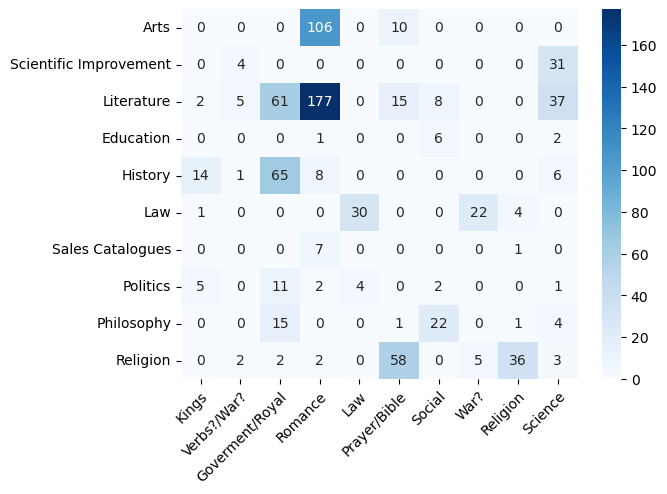

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have 'cm' as your confusion matrix from previous steps

# Create a heatmap of the confusion matrix

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(predicted_topic_labels[1720].values()), yticklabels=list(labels['main2id'].keys()))

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.show()

In [130]:
predicted_labels_1720 = list(predicted_topic_labels[1720].values())
predicted_labels_1720[4] = "Law (new)"
predicted_labels_1720[8] = "Religion (new)"
old_labels = list(labels['main2id'].keys())
label_map = {predicted_labels_1720[key]: old_labels[value]  for key, value in mapping_dict.items()}

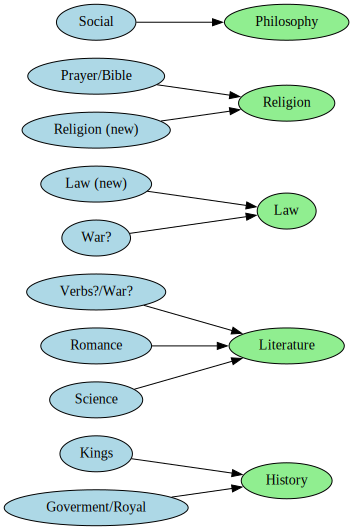

In [131]:
import pydot
from IPython.display import SVG

# Assuming you have 'mapping_dict' from previous steps

# Create a directed graph
graph = pydot.Dot(graph_type='digraph', rankdir='LR', splines='polyline')

# Add nodes and edges based on the mapping dictionary
for predicted_topic, ground_truth_category in label_map.items():
    # Create nodes
    predicted_node = pydot.Node(f"{predicted_topic}", style='filled', fillcolor='lightblue')
    ground_truth_node = pydot.Node(f"{ground_truth_category}", style='filled', fillcolor='lightgreen')

    # Add nodes to the graph
    graph.add_node(predicted_node)
    graph.add_node(ground_truth_node)

    # Create and add edge
    edge = pydot.Edge(predicted_node, ground_truth_node)
    graph.add_edge(edge)

# Visualize the graph
svg = SVG(graph.create_svg())
display(svg)

In [91]:
!pip install pydot graphviz

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable
